In [8]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.5.4
IPython 6.2.1

numpy 1.14.0
scipy 1.0.0
sklearn 0.20.0
pandas 0.22.0
matplotlib 2.1.2


# Chapter 4. 모델 훈련

- 이번 장에서 배울 내용
 - 가장 간단한 모델 중 하나인 선형 회귀
 - 비선형 데이터셋에 훈련시킬 수 있는 조금 더 복잡한 모델인 다항 회귀
 - 학습 곡선<sup>learning curve</sup>을 사용해 모델이 과대적합되는지 감지하는 방법
 - 훈련 세트의 과대적합을 감소시킬 수 있는 규제 기법

---
## 4.1 선형 회귀

다음은 1장에서 본 삶의 만족도에 대한 간단한 선형 회귀 모델

&nbsp;&nbsp;&nbsp;&nbsp;삶의 만족도 = $\theta$<sub>0</sub> + $\theta$<sub>1</sub> * 1인당_GDP

- 이 모델은 입력 특성인 1인당_GDP에 대한 선형 함수<br>
- &theta;<sub>0</sub>과 &theta;<sub>1</sub>이 모델 파라미터

일반적으로 선형 모델은 [식 4-1]에서처럼 입력 특성의 가중치 합과 **편향**<sup>bias</sup>(또는 **절편**<sup>intercept</sup>)이라는 상수를 더해 예측을 만듦

![equation4-1](./images/equation4-1.png)
<br>
<center>**식 4-1 선형 회귀 모델의 예측**</center>

- $\hat{y}$은 예측값
- n은 특성의 수
- x<sub>i</sub>는 i번째 특성값
- $\theta$<sub>j</sub>는 j번째 모델 파라미터(편향 $\theta$<sub>0</sub>과 특성의 가중치 $\theta$<sub>1</sub>, $\theta$<sub>2</sub>, ..., $\theta$<sub>n</sub>을 포함)

이 식은 [식 4-2]처럼 벡터 형태로 더 간단하게 쓸 수 있음

<img src="./images/equation4-2.png" width="40%">
<center>**식 4-2 선형 회귀 모델의 예측(벡터 형태)**</center>

- $\theta$는 모델의 파라미터 벡터
- $\theta$<sup>T</sup>는 $\theta$의 전치(열 벡터가 아니고 행 벡터)
- x는 x<sub>0</sub>에서 x<sub>n</sub>까지 담고 있는 샘플의 **특성 벡터**. x<sub>0</sub>는 항상 1
- h<sub>$\theta$</sub>는 모델 파라미터 $\theta$를 사용한 가설<sup>hypothesis</sup> 함수

- 모델 훈련 : 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것<br>
이를 위해 먼저 모델이 훈련 데이터에 잘 들어맞는지 측정해야 함.<br>
성능 측정 지표로는 평균 제곱 오차<sup>Mean Square Error</sup>(MSE)를 최소화

훈련 세트 X에 대한 선형 회귀 가설 h<sub>$\theta$</sub>의 MSE는 [식 4-3]처럼 계산함

<img src="./images/equation4-3.png" width="50%">
<center>**식 4-3 선형 회귀 모델의 MSE 비용 함수**</center>

### 4.1.1 정규방정식

**정규방정식**<sup>Normal Equation</sup> : 비용 함수를 최소화하는 $\theta$ 값을 얻을 수 있는 수학 공식(식 4-4)

<img src="./images/equation4-4.png" width="30%">
<center>**식 4-4 정규방정식**</center>

- $\hat{\theta}$은 비용 함수를 최소화하는 $\theta$ 값<br>
- y는 y<sup>(1)</sup>부터 y<sup>(m)</sup>까지 포함하는 타깃 벡터

이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 생성

In [14]:
import numpy as np

X = 2 * np.random.rand(100, 1) #균일 분포[0,1) , 100행 1열
y = 4 + 3 * X + np.random.randn(100, 1) #정규분포

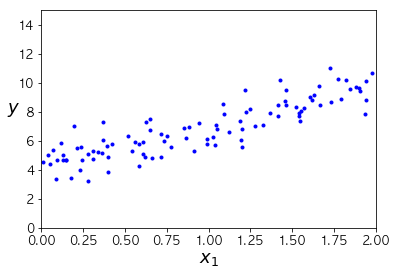

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

정규방정식을 사용해 $\hat{\theta}$을 계산

In [29]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다. 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만듦
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #inv():역행렬 계산, dot():행렬 곱셈 

In [17]:
theta_best

array([[4.21509616],
       [2.77011339]])

$\hat{\theta}$을 사용한 예측

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

아래 그래프는 모델의 예측을 나타냄

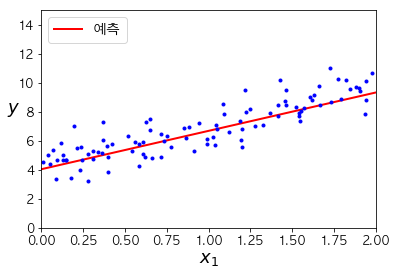

In [71]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측") # x범위, y범위, 스타일=빨간색 선
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

아래는 같은 작업을 하는 사이킷런 코드

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [21]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

### 4.1.2 계산 복잡도

- 정규방정식은 (n+1) x (n+1) 크기가 되는 X<sup>T</sup>$\cdot$X의 역행렬을 계산(n은 특성수)<br>
- 역행렬의 **계산 복잡도**<sup>computational complexity</sup> : O(n<sup>2.4</sup>) ~ O(n<sup>3</sup>)&nbsp;&nbsp;&nbsp;&nbsp; (구현 방법에 따라 차이가 있음)<br>
특성 수가 두 배로 늘어나면 계산 시간이 대략 5.3 ~ 8배 증가<br>
하지만 이 공식의 복잡도가 훈련 세트의 샘플 수에는 선형적으로 증가(즉, O(m))<br>
- 예측 계산 복잡도는 샘플 수 와 특성 수에 선형적. 학습된 선형 회귀 모델은 예측이 매우 빠름

---
## 4.2 경사 하강법

- **경사 하강법**<sup>Gradient Descent</sup>(GD) : 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 최적화 알고리즘<br>
$\theta$를 임의의 값으로 시작해서 한번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상 (그림 4-3)

<img src="./images/figure4-3.png" width="50%">
<center>**그림 4-3 경사 하강법**</center>

- 경사 하강법에서 중요한 파라미터는 스텝의 크기로, **학습률**<sup>learning rate</sup> 하이퍼파라미터로 결정<br>
- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림 (그림 4-4)

<img src="./images/figure4-4.png" width="50%">
<center>**그림 4-4 학습률이 너무 작을 때**</center>

- 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰어 이전보다 더 높은 곳으로 올라가게 되어 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못함 (그림 4-5)

<img src="./images/figure4-5.png" width="50%">
<center>**그림 4-5 학습률이 너무 클 때**</center>

[그림 4-6]은 경사 하강법의 두 가지 문제점을 보여줌
- 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 **전역 최솟값**<sup>global minimum</sup>보다 덜 좋은 **지역 최솟값**<sup>local minimum</sup>에 수렴<br>
- 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못함

<img src="./images/figure4-6.png" width="50%">
<br>
<center>**그림 4-6 경사 하강법의 문제점**</center>

- 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 **볼록 함수**<sup>convex function</sup><br>이는  지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻<br>
- 또한 연속된 함수이고 기울기가 갑자기 변하지 않음<br>
- 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장

- 비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있음<br>
[그림 4-7]에서 왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달하지만 오른쪽 그래프는 돌아서 나가기 때문에 시간이 오래 걸림<br>
- 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 함(예를 들면 사이킷런의 StandardScaler를 사용)<br>

<img src="./images/figure4-7.png" width="60%">
<center>**그림 4-7 특성 스케일에 따른 경사 하강법**</center>

- 앞의 그림은 모델 훈련이 (훈련 세트에서) 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일을 설명함. 이를 모델의 **파라미터 공간**<sup>parameter space</sup>에서 찾는다고 말함<br>
- 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워짐

### 4.2.1 배치 경사 하강법

- 비용 함수의 **편도함수**<sup>partial derivative</sup> : $\theta$<sub>j</sub>가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산

<img src="./images/equation4-5.png" width="50%">
<center>**식 4-5 비용 함수의 편도함수**</center>

편도함수를 각각 계산하는 대신 [식 4-6]을 사용하여 한꺼번에 계산<br>
그래디언트 벡터 $\nabla$<sub>$\theta$</sub>MSE($\theta$)는 비용 함수의 (모델 파라미터마다 한 개씩인) 편도함수를 모두 담고 있음

<img src="./images/equation4-6.png" width="60%">
<center>**식 4-6 비용 함수의 그래디언트 벡터**</center>

- 이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산하기 때문에 이 알고리즘을 **배치 경사 하강법**<sup>Batch Gradient Descent</sup>이라고 함<br>
- 이런 이유로 매우 큰 훈련 세트에서는 아주 느림. 하지만 특성 수에 민감하지는 않음

- 내려가는 스텝의 크기를 결정하기 위해 그래디언트 벡터에 학습률$\eta$를 곱함

<img src="./images/equation4-7.png" width="40%">
<center>**식 4-7 경사 하강법의 스텝**</center>

아래는 알고리즘을 구현한 코드

In [94]:
theta_path_bgd = [] # 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로
np.random.seed(42)  # 초기 난수 생성값 지정

eta = 0.1 #학습률
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

In [95]:
theta

array([[4.21509616],
       [2.77011339]])

[그림 4-8]은 세 가지 다른 학습률을 사용하여 진행한 경사 하강법의 스텝 처음 10개를 보여줌(점선은 시작점)

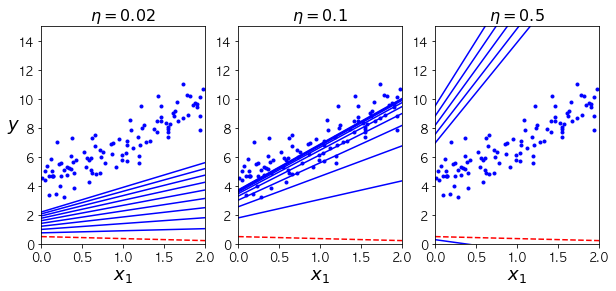

In [96]:
def plot_gradient_descent(theta, eta, theta_path=None):
    plt.plot(X, y, "b.")
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)            # 초기 난수 생성값 지정
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

- 왼쪽의 알고리즘은 최적점에 도달하겠지만 학습률이 너무 낮아 시간이 오래 걸릴 것<br>
- 가운데는 학습률이 아주 적당하여 반복 몇 번 만에 최적점에 수렴<br>
- 오른쪽은 학습률이 너무 높아 알고리즘이 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산

- 적절한 학습률을 찾으려면 그리드 탐색을 사용<br>
- 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한<br>
반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 $\varepsilon$(**허용오차**<sup>tolerance</sup>)보다 작아지면 경사 하강법이 (거의) 최솟값에 도달한 것이므로 알고리즘을 중지함<br>
- $\varepsilon$ 범위 안에서 최적의 솔루션에 도달하기 위해서는 O(1/$\varepsilon$)의 **반복**이 걸릴 수 있음. 다시 말해 허용오차 $\varepsilon$을 1/10로 줄이면 알고리즘의 반복은 10배 늘어남

### 4.2.2 확률적 경사 하강법

- 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산하여 훈련 세트가 커지면 매우 느려진다는 것<br>
- **확률적 경사 하강법**은 매 스텝에서 딱 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산. 매 반복에서 매우 적은 데이터만 처리하기 때문에 알고리즘이 훨씬 빠르고 매우 큰 훈련 세트도 훈련시킬 수 있음<br>
- 반면, 확률적이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정함<br>
비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소함. 시간이 지나면 최솟값에 매우 근접하겠지만 최적치는 아님 (그림 4-9 참조)

<img src="./images/figure4-9.png" width="40%">
<center>**그림 4-9 확률적 경사 하강법**</center>

- [그림 4-6]처럼 비용 함수가 매우 불규칙할 경우 지역 최솟값을 건너뛰어 전역 최솟값을 찾을 가능성이 높음<br>
- 지역 최솟값에서 탈출하지만 전역 최솟값에 다다르지 못하는 딜레마를 해결하는 한 가지 방법은 학습률을 점진적으로 감소시키는 것<br>
시작할 때는 학습률을 크게 하고(수렴 빠름, 지역 최솟값에 빠지지 않음) 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함<br>
- 매 반복에서 학습률을 결정하는 함수를 **학습 스케쥴**<sup>learning schedule</sup>이라고 부름

아래은 확률적 경사 하강법의 구현 코드

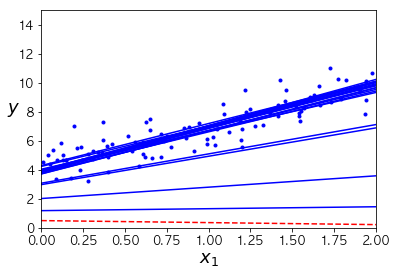

In [79]:
theta_path_sgd = [] # 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로
m = len(X_b)        # 훈련 세트에 있는 샘플 수
np.random.seed(42)  # 초기 난수 생성값 지정

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 훈련 스텝의 첫 20개를 그림
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # 하나의 샘플에 대한 그래디언트를 계산하므로 식 4-6에서 /m 이 없음
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients # 식 4-7
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [73]:
theta

array([[4.21076011],
       [2.74856079]])

- 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있음<br>
- 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 썩는 식의 방법을 사용<br>
- 그러나 이렇게 하면 보통 더 늦게 수렴됨

사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 SGDRegressor 클래스를 사용<br>

In [74]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42) # 학습률 0.1, 에포크 50번
sgd_reg.fit(X, y.ravel()) # 다차원 배열(array)을 1차원 배열로 평평하게 펴줌, NumPy의 reshape()함수와 반대 기능

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [75]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

### 4.2.3 미니배치 경사 하강법

- **미니배치 경사 하강법**<sup>Mini-batch Gradient Descent</sup> : 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그래디언트를 계산하는 것이 아니라 **미니배치**라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산<br>
- 장점 : 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상

- 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직여 최솟값에 더 가까이 도달<br>
- 하지만 지역 최솟값에서 빠져나오기는 더 힘들지도 모름

In [80]:
theta_path_mgd = [] # 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로

n_iterations = 50
minibatch_size = 20

np.random.seed(42)            # 초기 난수 생성값 지정
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi) # 식 4-6
        eta = learning_schedule(t)
        theta = theta - eta * gradients # 식 4-7
        theta_path_mgd.append(theta)

In [81]:
theta

array([[4.25214635],
       [2.7896408 ]])

아래 그림은 세 가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로를 나타냄

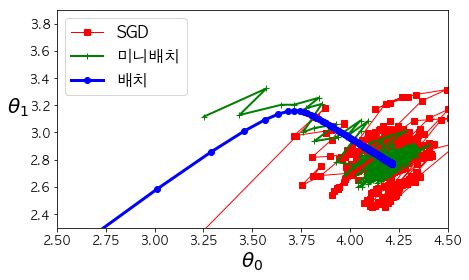

In [89]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="미니배치")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="배치")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

지금까지 논의한 알고리즘을 선형 회귀를 사용해 비교함(m은 훈련 샘플 수, n은 특성 수). [표 4-1] 참조

<img src="./images/table4-1.png" width="80%">
<center>**표 4-1 선형 회귀를 사용한 알고리즘 비교**</center>

---
## 4.3 다항 회귀

- **다항 회귀**<sup>Polynomial Regression</sup> : 비선형 데이터를 학습하기 위해 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 기법

먼저 간단한 **2차방정식**<sup>quadratic equation</sup>으로 비선형 데이터를 생성(약간의 노이즈 포함)

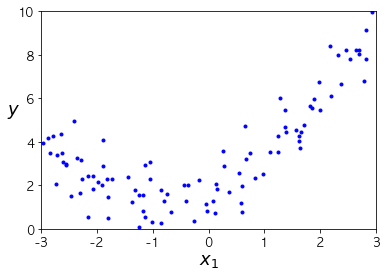

In [99]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

사이킷런의 PolynomialFeatures를 사용해 훈련 데이터를 변환

In [106]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [107]:
X_poly[0]

array([-0.75275929,  0.56664654])

이 확장된 훈련 데이터에 Linear Regression을 적용

In [108]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

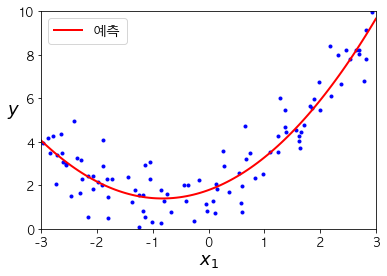

In [109]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # 시작, 끝점을 균일간격으로 100개 생성
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="예측")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

- 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음(일반적인 선형 회귀 모델에서는 하지 못함)<br>
- PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문